# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 424s 3us/step


In [3]:
print('trian: ', len(X_train))
print('test: ', len(X_test))

trian:  50000
test:  10000


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [11]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=20):
    fig = plt.gcf() #Get the current figure. If no current figure exists, a new one is created using figure().
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','
        if len(prediction)>0:
            title+='=>'
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

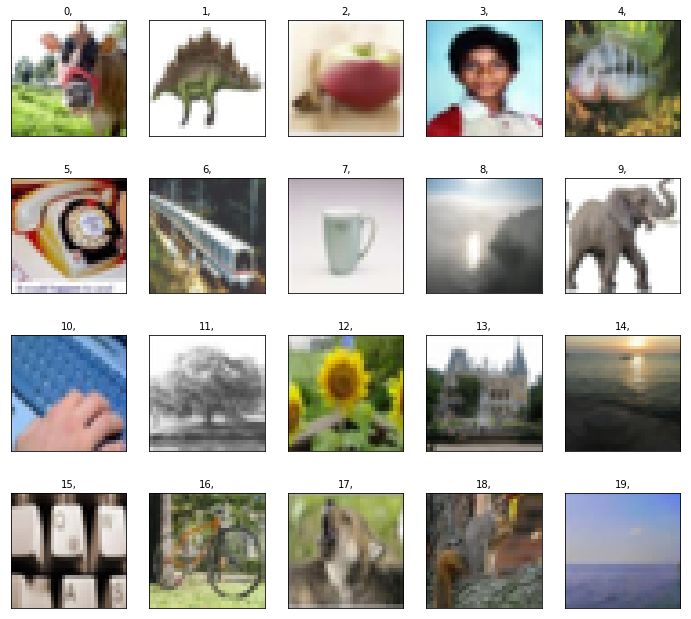

In [12]:
plot_images_labels_prediction(X_train,y_train,[],0)

In [13]:
print('x_img_test:',X_test.shape)
print('y_label_test :',y_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [15]:
X_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [16]:
x_train_normalize = X_train.astype('float32') / 255.0
x_test_normalize = X_test.astype('float32') / 255.0

In [17]:
x_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [19]:
y_train.shape

(50000, 1)

In [21]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [23]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_train)
y_label_test_OneHot = np_utils.to_categorical(y_test)

In [24]:
y_label_train_OneHot.shape

(50000, 100)

In [25]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.